# Tutorial
Here we demonstrate the `petropandas` package. It could be activated by importing pandas alias `pd` from `petropandas`. We also import mineral database `mindb`

In [1]:
from petropandas import pd, mindb

`petropandas` are designed as `pandas.DataFrame` accessors, so we need to create `pandas.DataFrame` before we can use it. There are several accessors available:

| Accessors | Description |
| --- | --- |
| **petro**      | petropandas utilities |
| **petroplots** | petrological plots |
| **oxides**     | common calculations with oxides |
| **ree**        | for rare earth element analyses |
| **isoplot**    | format data for IsoplotR online |
| **ions**       | calculations with ions |
| **elements**   | calculations with elements |

Here we're using data from built-in examples, but you can read data from files, clipboard etc. For more details, check https://pandas.pydata.org/docs/reference/io.html

In [2]:
from petropandas.data import bulk as rock
from petropandas.data import minerals as df
from petropandas.data import grt_profile as pro

## Mineral recalculations

Let's see our dataframe...

In [3]:
df

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3,F,Cl,Total,Comment
0,37.218,20.349,13.784,13.140,0.000,0.013,8.998,0.404,1.010,0.022,0.020,0.005,0.007,0.367,0.368,95.467,bt-01
1,37.363,20.037,14.106,12.539,0.000,0.013,8.946,0.461,1.206,0.020,0.042,0.000,0.000,0.313,0.335,95.173,bt-02
2,23.748,22.152,9.611,31.549,0.066,0.028,0.023,0.035,0.047,0.000,0.017,0.037,0.000,0.017,0.196,87.475,chl-04
3,46.986,39.183,0.151,1.264,0.033,0.410,3.409,4.883,0.083,0.000,0.000,0.006,0.000,0.000,0.065,96.458,pa-05
4,48.389,32.414,8.227,7.713,0.060,0.027,0.000,0.924,0.005,0.009,0.000,0.005,0.000,0.000,0.014,97.784,cd-06
5,48.870,32.696,8.390,7.482,0.068,0.049,0.000,0.845,0.000,0.000,0.000,0.000,0.000,0.000,0.023,98.418,cd-07
6,61.839,24.661,0.000,0.484,0.015,5.738,0.032,7.917,0.000,0.010,0.019,0.025,0.000,0.000,0.000,100.740,pl-08
7,37.816,21.184,4.189,35.118,1.001,1.435,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.004,100.752,g-09
8,37.584,21.311,4.651,33.895,0.999,1.454,0.000,0.035,0.013,0.034,0.000,0.030,0.107,0.000,0.014,100.124,g-10
9,60.657,25.087,0.001,0.000,0.000,5.849,0.106,7.940,0.000,0.000,0.003,0.113,0.000,0.000,0.000,99.756,pl-22


The accessor `petro` provides several common utilities. Here, we use the `search` to quickly select data of interest. Of course, any other standard `pandas` techniques could be used as well.

Let's select analyses of garnet identified by `"g-"` in column `"Comments"`.

In [4]:
g = df.petro.search("g-", on="Comment")
g

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3,F,Cl,Total,Comment
7,37.816,21.184,4.189,35.118,1.001,1.435,0.0,0.000,0.000,0.000,0.0,0.006,0.000,0.0,0.004,100.752,g-09
8,37.584,21.311,4.651,33.895,0.999,1.454,0.0,0.035,0.013,0.034,0.0,0.030,0.107,0.0,0.014,100.124,g-10


wt% could be converted to molar proportions using `molprop` method:

In [5]:
g.oxides.molprop()

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3
7,0.629396,0.207768,0.103935,0.488809,0.014111,0.025590,0.0,0.000000,0.000000,0.000000,0.0,0.000042,0.000000
8,0.625535,0.209013,0.115398,0.471786,0.014083,0.025929,0.0,0.000565,0.000163,0.000224,0.0,0.000211,0.000474


Analyses could be converted to cations p.f.u, either providing number of oxygens:

In [6]:
g.oxides.cations(noxy=12)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
7,3.003379,1.982869,0.495962,2.332521,0.067336,0.122111,0.0,0.000000,0.000000,0.00000,0.0,0.000403,0.000000
8,2.991386,1.999055,0.551848,2.256141,0.067346,0.123994,0.0,0.005401,0.000778,0.00214,0.0,0.002021,0.004532


or number of cations:

In [7]:
g.oxides.cations(ncat=8, tocat=True)

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+}
7,3.001661,1.981734,0.495678,2.331186,0.067297,0.122041,0.0,0.000000,0.000000,0.000000,0.0,0.000403,0.000000
8,2.989651,1.997896,0.551528,2.254832,0.067307,0.123922,0.0,0.005398,0.000778,0.002138,0.0,0.002020,0.004529


or using mineral instance `mindb.Garnet` from database. Note keeword argument `keep` to keep extra columns in resultind dataframe:

In [8]:
grt = mindb.Garnet()
g.oxides.apfu(grt, keep=["Comment"])

,Si{4+},Al{3+},Mg{2+},Fe{2+},Mn{2+},Ca{2+},K{+},Na{+},Ti{4+},Cr{3+},Zn{2+},P{5+},Y{3+},Fe{3+},Comment
7,3.001661,1.981734,0.495678,2.317451,0.067297,0.122041,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.013735,g-09
8,2.989651,1.997896,0.551528,2.240917,0.067307,0.123922,0.0,0.005398,0.000778,0.002138,0.0,0.0,0.004529,0.009537,g-10


We also can quickly calculate proportions of mineral endmembers:

In [9]:
g.oxides.endmembers(grt)

,Alm,Prp,Sps,Grs,Adr,Uv,CaTi
7,0.771849,0.165090,0.022414,0.040367,0.000280,0.000000,0.000000
8,0.751060,0.184849,0.022558,0.041276,0.000197,0.000044,0.000016


or ignoring ferric iron and using `mindb.Garnet_Fe2` model

In [10]:
grt2 = mindb.Garnet_Fe2()
g.oxides.endmembers(grt2)

,Alm,Prp,Sps,Grs
7,0.773959,0.164566,0.022343,0.039132
8,0.752215,0.183990,0.022454,0.041341


To recalculate iron based on charge balance, use `recalculate_Fe`:

In [11]:
g.oxides.recalculate_Fe(noxy=12, ncat=8)

,SiO2,Al2O3,MgO,FeO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3,Fe2O3
7,37.816,21.184,4.189,34.911088,1.001,1.435,0.0,0.000,0.000,0.000,0.0,0.006,0.000,0.229950
8,37.584,21.311,4.651,33.685819,0.999,1.454,0.0,0.035,0.013,0.034,0.0,0.030,0.107,0.232472


or you can convert iron manually:

In [12]:
g.oxides.convert_Fe(to="Fe2O3")

,SiO2,Al2O3,MgO,MnO,CaO,K2O,Na2O,TiO2,Cr2O3,ZnO,P2O5,Y2O3,Fe2O3
7,37.816,21.184,4.189,1.001,1.435,0.0,0.000,0.000,0.000,0.0,0.006,0.000,39.028228
8,37.584,21.311,4.651,0.999,1.454,0.0,0.035,0.013,0.034,0.0,0.030,0.107,37.669053


Similarily, we can recalculate analyses of plagioclase

In [13]:
p = df.petro.search("pl-", on="Comment")
plg = mindb.Feldspar()
p.oxides.endmembers(plg)

,An,Ab,Or
6,0.285439,0.712666,0.001895
9,0.287517,0.706279,0.006204
10,0.284836,0.710546,0.004619


## Mineral plots

`petroplots` accessor provides some common plots, e.g. garnet profile:

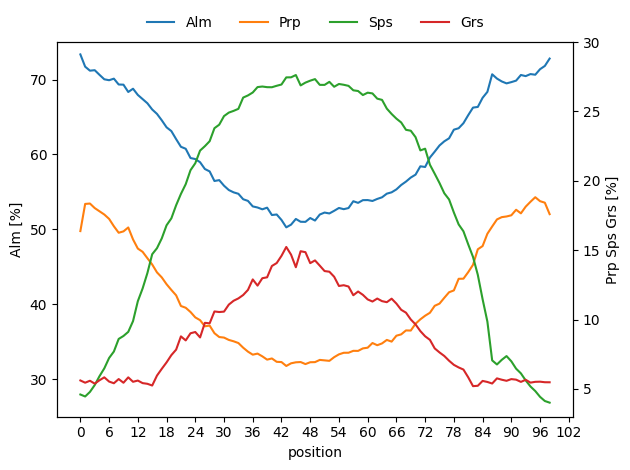

In [14]:
em = pro.oxides.endmembers(grt)
em.petroplots.garnet_profile(percents=True, lim=(25, 75), lim_extra=(3, 30))

or ternary plots:

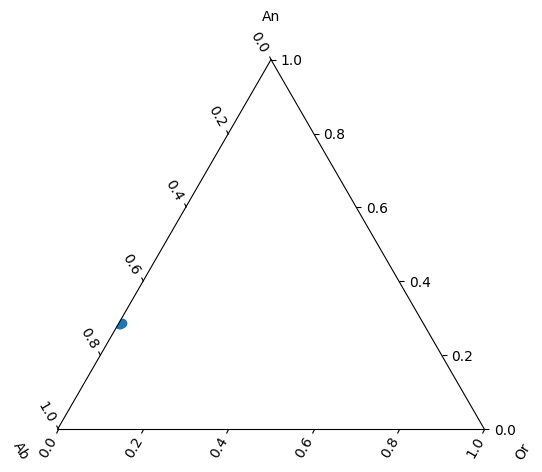

In [15]:
pem = p.oxides.endmembers(plg)
pem.petroplots.ternary("An", "Ab", "Or") 

## EPMA area analyses

Here we use example data of local bulk rock composition measured from thinsection. To obtain average composition, several areas of the same size have been measured:

In [16]:
rock

,Label,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,FeO,Total
0,Spectrum 1,3.33,1.46,9.32,77.82,0.00,1.84,0.90,0.75,0.06,3.96,99.35
1,Spectrum 2,4.18,2.05,13.19,73.44,0.03,2.64,1.13,1.07,0.07,5.81,103.62
2,Spectrum 3,2.31,6.25,20.73,39.89,0.33,6.35,0.89,3.53,0.83,19.01,100.11
3,Spectrum 4,1.89,4.06,20.62,38.54,0.74,2.20,2.01,3.73,4.62,24.50,102.90
4,Spectrum 5,3.80,3.97,21.22,43.56,0.31,3.65,1.48,3.29,1.84,17.02,100.15
5,Spectrum 6,2.67,4.66,20.09,41.00,0.30,3.89,1.45,2.93,2.84,20.59,100.42
6,Spectrum 7,0.57,3.86,19.62,35.74,0.51,1.29,1.99,3.48,6.68,28.32,102.06
7,Spectrum 8,1.54,6.96,19.39,38.36,0.24,7.05,0.67,3.63,0.97,20.72,99.52
8,Spectrum 9,3.06,1.39,8.66,80.20,0.00,1.74,0.85,0.74,0.05,4.08,100.70


To calculate the average composition, we can calculate the average using `mean`

In [17]:
avg = rock.oxides.mean()
avg

,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,FeO
0,2.594444,3.851111,16.982222,52.061111,0.273333,3.405556,1.263333,2.572222,1.995556,16.001111


To use this composition for modelling software, you can use methods to format it. Note that apatite correction and iron conversion to FeO is done automatically. For THERMOCALC

In [18]:
avg.oxides.TCbulk(H2O=1.5, oxygen=0.1)

bulk    H2O   SiO2  Al2O3    CaO    MgO    FeO    K2O   Na2O   TiO2    MnO      O
bulk  5.329 54.420 10.461  1.012  6.001 13.988  2.271  2.629  2.023  1.767  0.100  % 0


for PerpleX

In [19]:
avg.oxides.Perplexbulk(H2O=1.5, oxygen=0.1)

begin thermodynamic component list
H2O   1  5.32855      0.00000      0.00000     molar amount
SiO2  1 54.42028      0.00000      0.00000     molar amount
Al2O3 1 10.46076      0.00000      0.00000     molar amount
CaO   1  1.01178      0.00000      0.00000     molar amount
MgO   1  6.00118      0.00000      0.00000     molar amount
FeO   1 13.98809      0.00000      0.00000     molar amount
K2O   1  2.27068      0.00000      0.00000     molar amount
Na2O  1  2.62907      0.00000      0.00000     molar amount
TiO2  1  2.02279      0.00000      0.00000     molar amount
MnO   1  1.76681      0.00000      0.00000     molar amount
O2    1  0.20000      0.00000      0.00000     molar amount
end thermodynamic component list


or MAGEMin

In [20]:
avg.oxides.MAGEMin(H2O=1.5, oxygen=0.1, db='mp')

# HEADER
title; comments; db; sysUnit; oxide; frac; frac2
# BULK-ROCK COMPOSITION
0;petropandas;mp;mol;[SiO2, Al2O3, CaO, MgO, FeO, K2O, Na2O, TiO2, O, MnO, H2O];[54.420, 10.461, 1.012, 6.001, 13.988, 2.271, 2.629, 2.023, 0.100, 1.767, 5.329];
